In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy=pd.read_csv('bankruptcy-prevention.csv',sep = ';') # For excel dataset use bankruptcy=pd.read_excel('bankruptcy-prevention.xlsx',sep = ';')

In [3]:
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# EDA

In [4]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
bankruptcy.shape

(250, 7)

In [6]:
bankruptcy.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
bankruptcy.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [8]:
#finding the duplicated rows
bankruptcy.duplicated().sum()

147

In [9]:
bankruptcy['class01']=1

In [10]:
bankruptcy=bankruptcy.rename({' class':'class'},axis=1)

In [11]:
#changing the datatype of target variable 'class', bankruptcy=0 and non-bankruptcy=1
bankruptcy.loc[bankruptcy['class'] == 'bankruptcy', 'class01'] = 0

In [12]:
bankruptcy.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class01
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0


In [13]:
bankruptcy.drop(['class'],axis=1,inplace=True)

In [14]:
bankruptcy.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
class01                     int64
dtype: object

In [15]:
#identifying missing values
bankruptcy.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
class01                   0
dtype: int64

array([[<Axes: title={'center': 'industrial_risk'}>,
        <Axes: title={'center': ' management_risk'}>,
        <Axes: title={'center': ' financial_flexibility'}>],
       [<Axes: title={'center': ' credibility'}>,
        <Axes: title={'center': ' competitiveness'}>,
        <Axes: title={'center': ' operating_risk'}>],
       [<Axes: title={'center': 'class01'}>, <Axes: >, <Axes: >]],
      dtype=object)

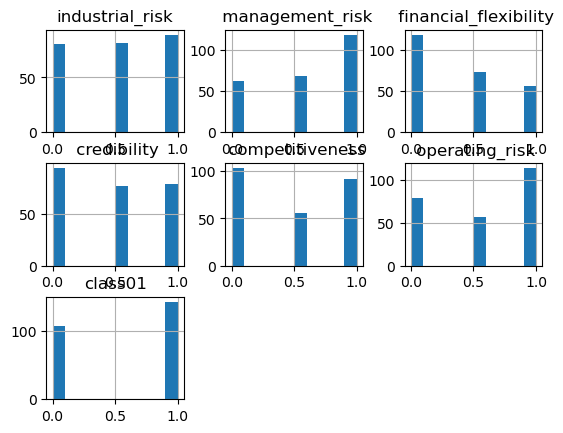

In [16]:
bankruptcy.hist()

<Axes: >

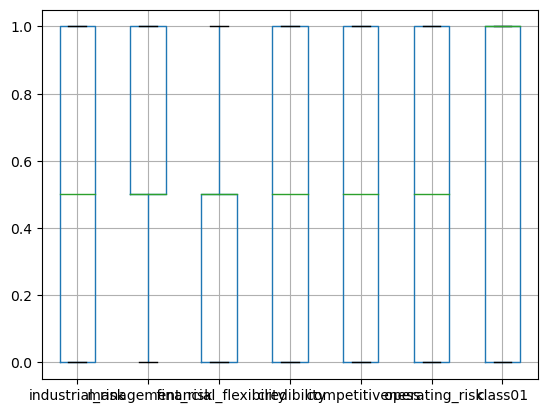

In [17]:
bankruptcy.boxplot()

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


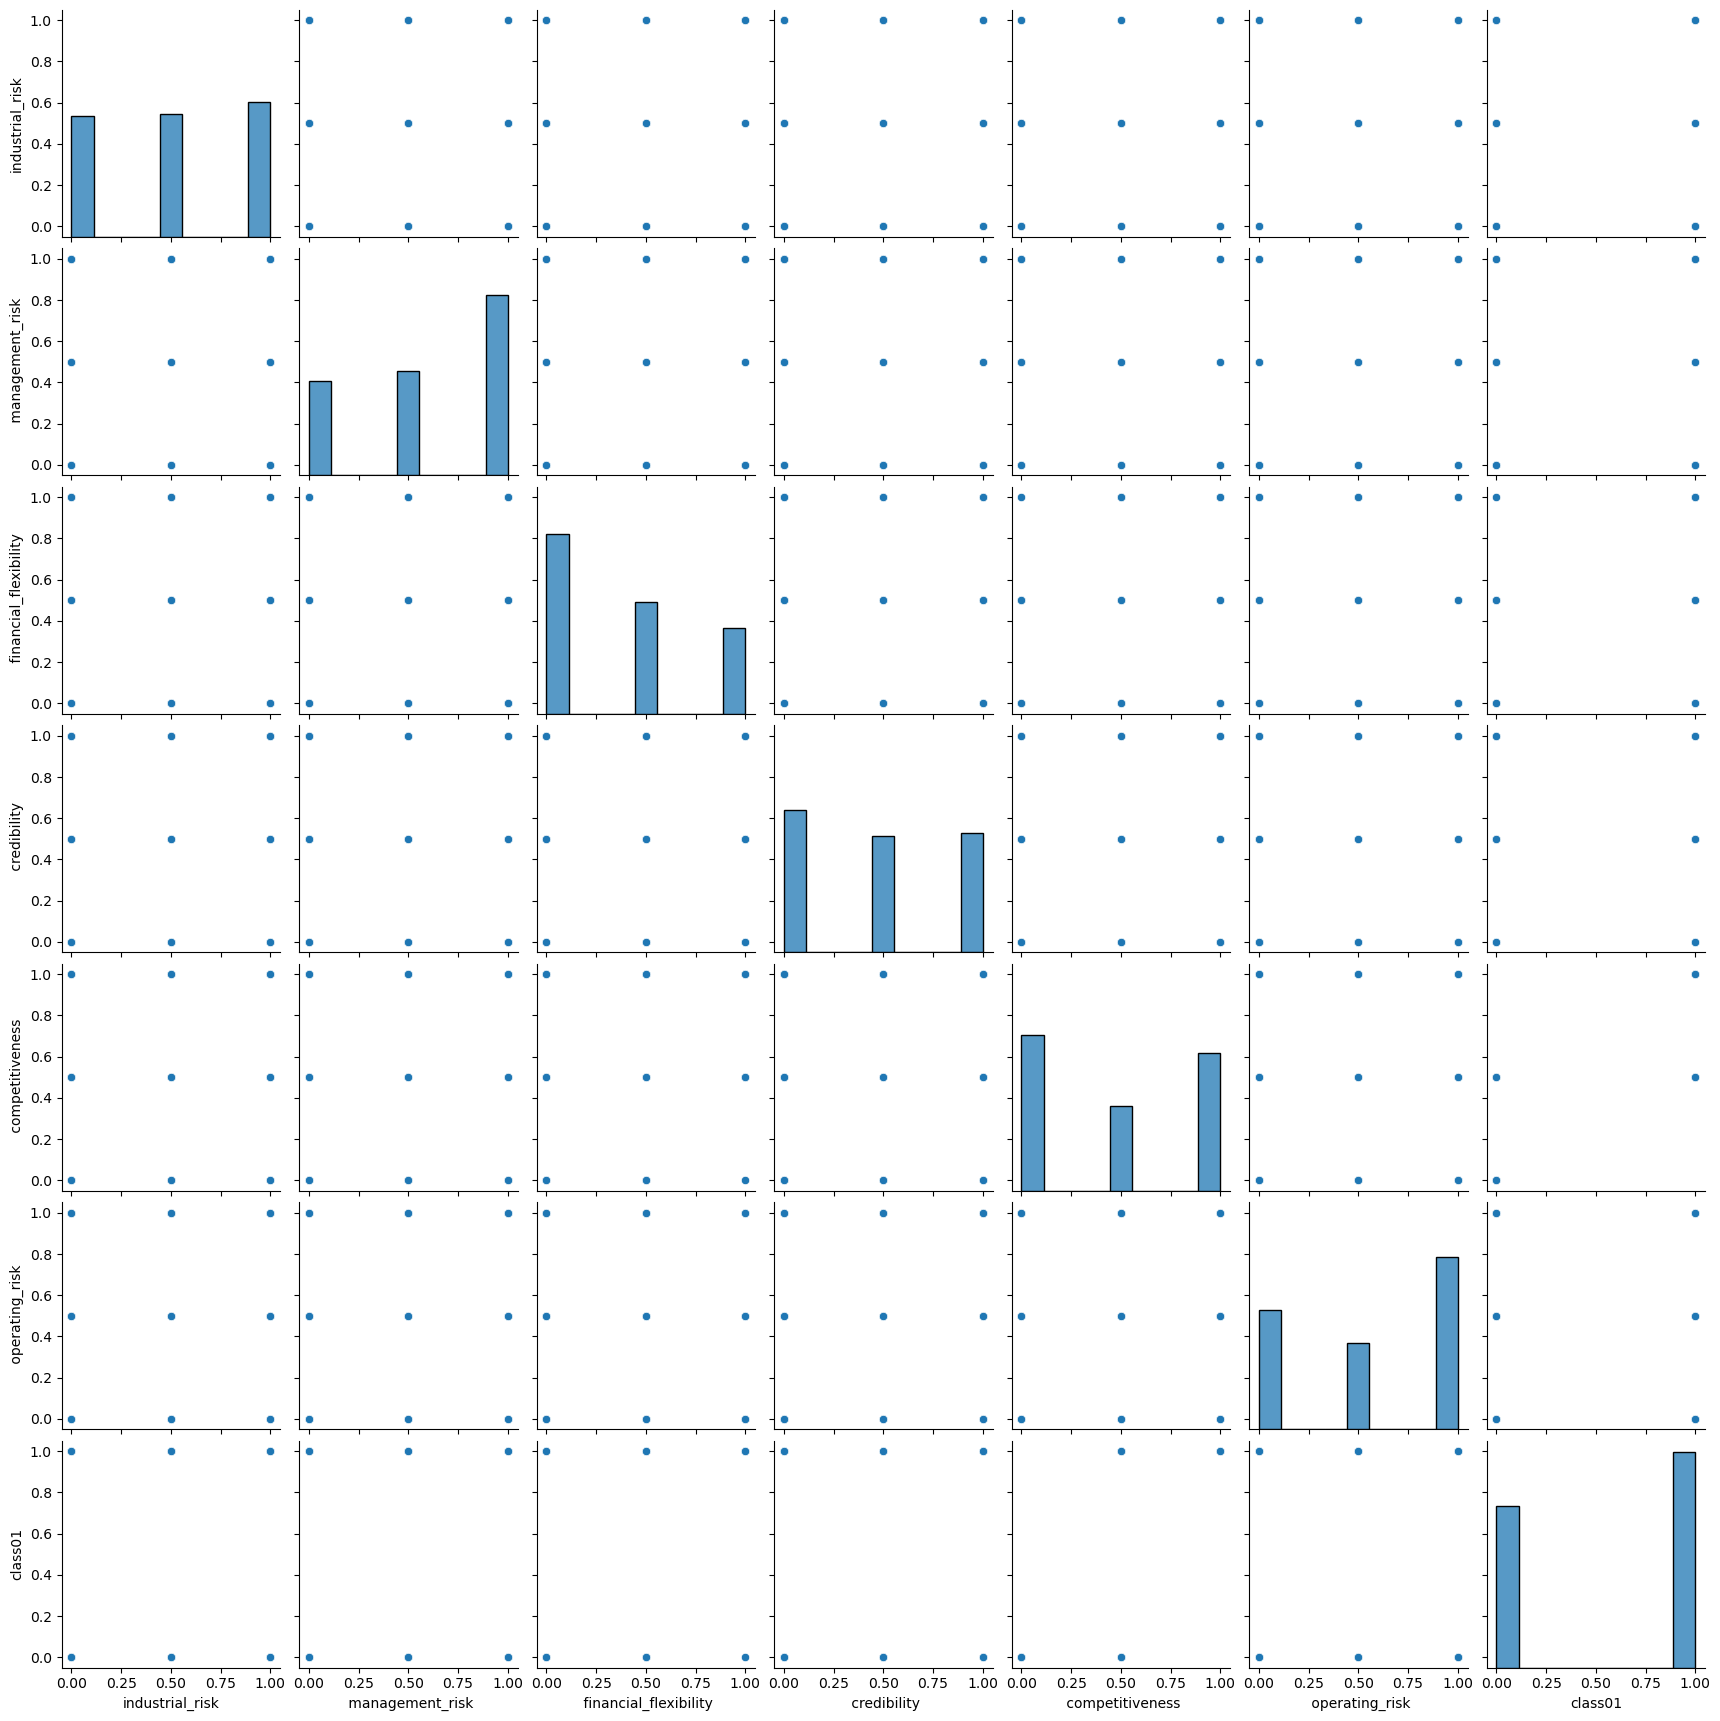

In [18]:
import seaborn as sns
sns.pairplot(bankruptcy)

<Axes: >

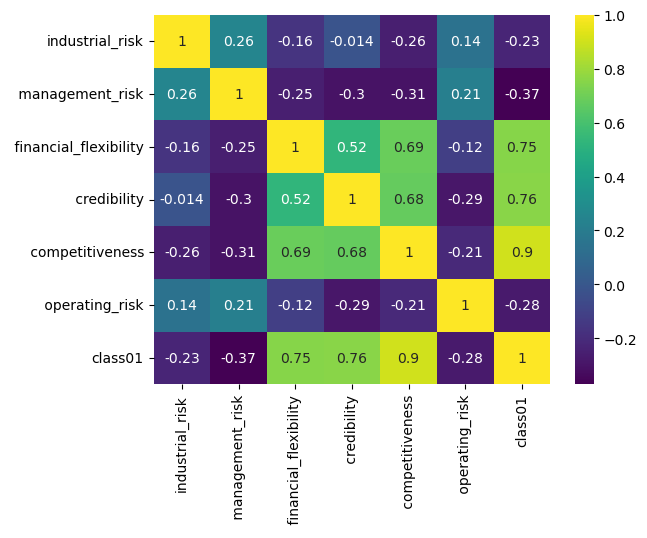

In [19]:
sns.heatmap(bankruptcy.corr(),annot=True,cmap='viridis')

In [20]:
#correlation
bankruptcy.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class01
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class01,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


# Model Building

In [21]:
# Dividing our data into input and output variables 
X = bankruptcy.iloc[:,0:6]
Y = bankruptcy.iloc[:,6]

In [22]:
#splitting into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=0)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
classifier=LogisticRegression()

In [25]:
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
y_pred1=classifier.predict(xtest)
y_pred1

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred1)
cm

array([[18,  0],
       [ 0, 32]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_logist=accuracy_score(ytest,y_pred1)

In [29]:
accuracy_logist

1.0

In [30]:
#train accuracy
train_acc=np.mean(classifier.predict(xtrain)==ytrain)
train_acc

0.995

In [31]:
#test accuracy
test_acc=np.mean(classifier.predict(xtest)==ytest)
test_acc

1.0

In [32]:
# Finiding accuracy for overall model

In [33]:
classifier.fit(X,Y)

LogisticRegression()

In [34]:
#predict for x dataset
y_pred=classifier.predict(X)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})

In [37]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
245,1,1
246,1,1
247,1,1
248,1,1


In [38]:
#Confusion Matrix for model accuracy
confusionmatrix=confusion_matrix(Y,y_pred)

In [39]:
confusionmatrix

array([[106,   1],
       [  0, 143]], dtype=int64)

In [40]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
#model accuracy
acc=accuracy_score(Y,y_pred)
acc

0.996

In [41]:
#Classification Report
from sklearn.metrics import classification_report

In [42]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      1.00       143

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [43]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
fpr , tpr, thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
roc_auc_score(Y,y_pred)

0.9953271028037383

In [45]:
auc=roc_auc_score(Y,y_pred)

Text(0, 0.5, 'True Positive Rate')

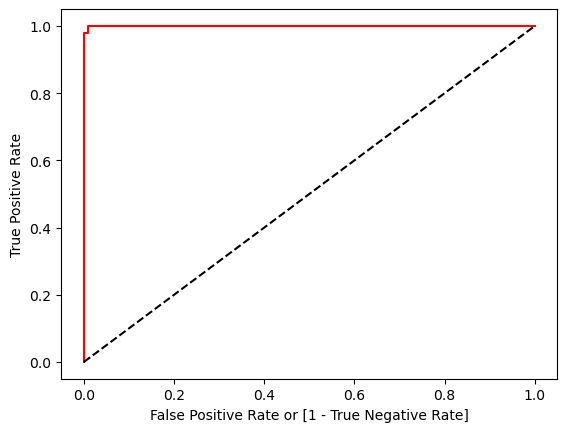

In [46]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [48]:
#Multinomial NB
classifier_mb = MB()
classifier_mb.fit(xtrain,ytrain)

train_pred_mb=classifier_mb.predict(xtrain)
train_accuracy_mb=np.mean(ytrain==train_pred_mb)

test_pred_mb=classifier_mb.predict(xtest)
test_accuracy_mb=np.mean(ytest==test_pred_mb)

In [49]:
train_accuracy_mb,test_accuracy_mb

(0.975, 1.0)

In [50]:
#Guassian Naive Bayes
classifier_gb=GB()
classifier_gb.fit(xtrain,ytrain)

train_pred_gb=classifier_gb.predict(xtrain)
train_accuracy_gb=np.mean(ytrain==train_pred_gb)

test_pred_gb=classifier_gb.predict(xtest)
test_accuracy_gb=np.mean(ytest==test_pred_gb)

In [51]:
train_accuracy_gb,test_accuracy_gb

(0.975, 1.0)

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
KNClassifier=KNeighborsClassifier(n_neighbors=7)

In [54]:
KNClassifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [55]:
y_predict=KNClassifier.predict(xtest)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [56]:
#confusion matrix
cm_knn=confusion_matrix(ytest,y_predict)
cm_knn

array([[18,  0],
       [ 1, 31]], dtype=int64)

In [57]:
#f1 score
from sklearn.metrics import f1_score
f1_score(ytest,y_predict)

0.9841269841269841

In [58]:
#train accuracy
train_pred_knn=KNClassifier.predict(xtrain)
train_accuracy_knn=np.mean(ytrain==train_pred_knn)
train_accuracy_knn

0.99

In [98]:
#test accuracy
test_pred_knn=KNClassifier.predict(xtest)
test_accuracy_knn=np.mean(ytest==test_pred_knn)
test_accuracy_knn

0.98

In [60]:
#overall KNN model accuracy
knn_accuracy=accuracy_score(ytest,y_predict)
knn_accuracy

0.98

In [61]:
#performing knn model for differentv k values
acc=[]
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(xtrain, ytrain)
    train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
    test_acc = accuracy_score(neigh.predict(xtest), ytest)
    acc.append([train_acc, test_acc])

In [62]:
acc

[[0.995, 1.0],
 [0.995, 0.98],
 [0.99, 0.98],
 [0.985, 0.98],
 [0.985, 0.98],
 [0.995, 0.98],
 [0.985, 1.0],
 [0.995, 0.98],
 [0.995, 0.98],
 [0.995, 0.98],
 [0.985, 1.0],
 [0.995, 1.0],
 [0.995, 0.98],
 [0.995, 0.98],
 [0.995, 1.0],
 [0.99, 0.98],
 [0.995, 1.0],
 [0.995, 1.0],
 [0.985, 1.0],
 [0.995, 1.0],
 [0.985, 1.0],
 [0.995, 1.0],
 [0.995, 1.0],
 [0.99, 1.0]]

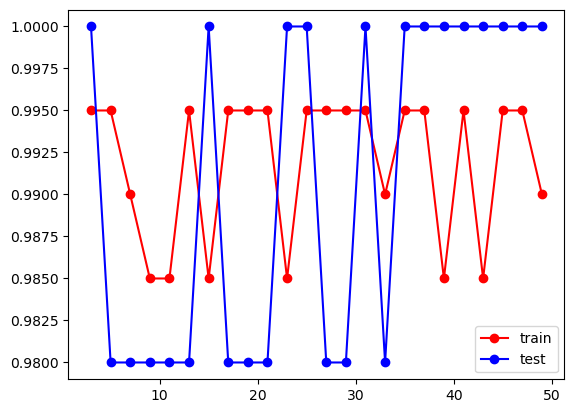

In [63]:
# train accuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in acc], "ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc], "bo-")

plt.legend(["train", "test"])

Trying for different n_neighbors values with reference to the above plot

In [64]:
neigh = KNeighborsClassifier(n_neighbors = 6)
neigh.fit(xtrain, ytrain)

train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
test_acc = accuracy_score(neigh.predict(xtest), ytest)

print(train_acc)
print(test_acc)

0.99
0.98


In [65]:
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(xtrain, ytrain)

train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
test_acc = accuracy_score(neigh.predict(xtest), ytest)

print(train_acc)
print(test_acc)

0.985
0.98


# SVM

In [66]:
from sklearn import svm
from sklearn.svm import SVC

In [67]:
# kernel= 'rbf'
svm_rbf=SVC(kernel='rbf',C =1000,gamma='scale')
svm_rbf.fit(xtrain,ytrain)
pred_rbf=svm_rbf.predict(xtest)

#test accuracy
test_accuracy_rbf=accuracy_score(ytest,pred_rbf)

#train accuracy
train_accuracy_rbf=accuracy_score(ytrain,svm_rbf.predict(xtrain))

In [68]:
print(test_accuracy_rbf)
print(train_accuracy_rbf)

1.0
1.0


In [69]:
#Using gridsearchCV

from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':['scale'],'C':[1000] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000], 'gamma': ['scale'], 'kernel': ['rbf']}])

In [70]:
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)
acc = accuracy_score(ytest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, y_pred)

Accuracy = 100.0


array([[18,  0],
       [ 0, 32]], dtype=int64)

# Decision Tree Classifier

using ENTROPY CRITERION

In [71]:
from sklearn.tree import DecisionTreeClassifier

DT_entropy=DecisionTreeClassifier(criterion='entropy',max_depth = 3, min_samples_leaf = 6)
DT_entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)

In [72]:
pred_test_dt=DT_entropy.predict(xtest)
pred_train_dt=DT_entropy.predict(xtrain)

In [73]:
#confusion_matrix
cm_entropy=confusion_matrix(ytest,pred_test_dt)
cm_entropy

array([[18,  0],
       [ 4, 28]], dtype=int64)

In [74]:
#entopy accuracy score
test_accuracy_entropy=accuracy_score(ytest,pred_test_dt)
train_accuracy_entropy=accuracy_score(ytrain,pred_train_dt)

In [75]:
print(test_accuracy_entropy)
print(train_accuracy_entropy)

0.92
0.985


[Text(0.4, 0.8333333333333334, 'x[4] <= 0.25\nentropy = 0.991\nsamples = 200\nvalue = [89, 111]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.25\nentropy = 0.218\nsamples = 115\nvalue = [4, 111]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 108\nvalue = [0, 108]')]

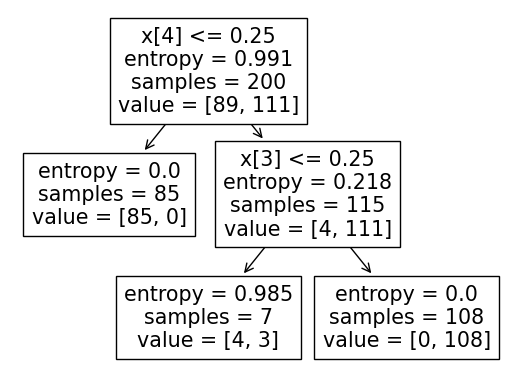

In [76]:
from sklearn import tree
tree.plot_tree(DT_entropy)

using GINI CRITERION

In [77]:
DT_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=4)
DT_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [78]:
pred_test_gini=DT_gini.predict(xtest)
pred_train_gini=DT_gini.predict(xtrain)

In [79]:
#confusion_matrix
cm_gini=confusion_matrix(ytest,pred_test_gini)
cm_gini

array([[18,  0],
       [ 4, 28]], dtype=int64)

In [80]:
#gini accuracy score
test_accuracy_gini=accuracy_score(ytest,pred_test_gini)
train_accuracy_gini=accuracy_score(ytrain,pred_train_gini)

In [81]:
print(test_accuracy_gini)
print(train_accuracy_gini)

0.92
0.985


# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model_rf = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=15,criterion="entropy")
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=5,
                       oob_score=True)

In [84]:
pred_test_rf=model_rf.predict(xtest)
pred_train_rf=model_rf.predict(xtrain)

In [85]:
#train and test accuracy sccore
test_accuracy_rf=accuracy_score(pred_test_rf,ytest)
train_accuracy_rf=accuracy_score(pred_train_rf,ytrain)

print(test_accuracy_rf)
print(train_accuracy_rf)

0.98
1.0


In [86]:
print(model_rf.score(xtest,ytest))
print(model_rf.score(xtrain,ytrain))

0.98
1.0


In [87]:
#confusion matrix
cm_rf=confusion_matrix(pred_test_rf,ytest)
cm_rf

array([[18,  1],
       [ 0, 31]], dtype=int64)

# Boosting

XGBoost

In [88]:
from xgboost import XGBClassifier

In [89]:
xgb_model=XGBClassifier()
xgb_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
pred_test_xgb=xgb_model.predict(xtest)
pred_test_xgb

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

In [91]:
pred_train_xgb=xgb_model.predict(xtrain)
pred_train_xgb

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1])

In [92]:
#Accuracy
test_accuracy_xgb=accuracy_score(pred_test_xgb,ytest)

train_accuracy_xgb=accuracy_score(pred_train_xgb,ytrain)

In [93]:
print(test_accuracy_xgb)
print(train_accuracy_xgb)

1.0
1.0


AdaBoost

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
Adaboost_model=AdaBoostClassifier()

Adaboost_model.fit(xtrain,ytrain)

AdaBoostClassifier()

In [96]:
#Accuracy

test_accuracy_ada=Adaboost_model.score(xtest,ytest)

train_accuracy_ada=Adaboost_model.score(xtrain,ytrain)

In [97]:
print(test_accuracy_ada)

print(train_accuracy_ada)

0.98
1.0


# Accuracies of all the models combined

In [103]:
Accuracies = pd.DataFrame({'Model Type':['Logistic Regression' ,'Naive Bayes','KNearestNeighbour','Support Vector Machines','Decision Tree Classifier','Random Forest classifier','XGBoost','AdaBoost']
                            ,'Accuracy':[accuracy_logist,test_accuracy_mb,knn_accuracy,test_accuracy_rbf,test_accuracy_entropy,test_accuracy_rf,test_accuracy_xgb,test_accuracy_ada]})

In [104]:
Accuracies

,Model Type,Accuracy
0,Logistic Regression,1.00
1,Naive Bayes,1.00
2,KNearestNeighbour,0.98
3,Support Vector Machines,1.00
4,Decision Tree Classifier,0.92
5,Random Forest classifier,0.98
6,XGBoost,1.00
7,AdaBoost,0.98
